In [1]:
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import sklearn 
import pandas as pd
from collections import defaultdict
import random
import csv
import pickle

### Problem 1 

### a) 
$$ \varepsilon = c_{in} - c_{out} $$
$$2c = c_{in} + c_{out}$$
$p_{in} = \frac{c_{in}}{n}$ and $p_{out} = \frac{c_{out}}{n}$

so:
$$p_{in} = \frac{2c + \varepsilon}{2n}$$
$$p_{out} = \frac{2c - \varepsilon}{2n}$$


Generate and create simple visualizations (using an off-the-shelf spring-embeddingalgorithm) of three graphs, for n= 50,q= 2,c= 5, and $\varepsilon={0,4,8}$.  Comment onthe strength of the community structure each of these graphs exhibits

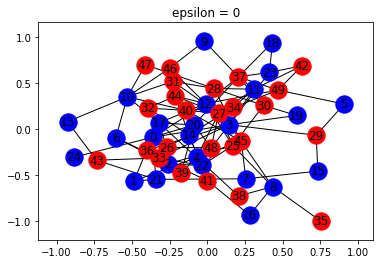

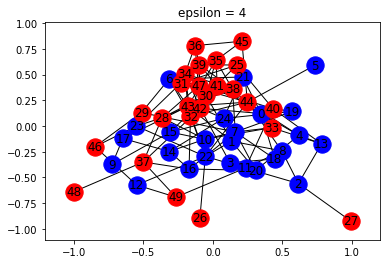

In [37]:
e_vals = [0, 4, 8]
titles = [
    'epsilon = 0',
    'epsilon = 4',
    'epsilon = 8'
]
for i, e in enumerate(e_vals):
    figure = plt.figure()
    p_in =  float(2 * 5 + e)/float(2 * 50)
    p_out = float(2 * 5 - e)/float(2 * 50)
    G = nx.planted_partition_graph(l=2, k=25, p_in=p_in, p_out=p_out)
    pos = nx.spring_layout(G)
#     print(G.graph['partition'][0])
    nx.draw_networkx_nodes(G, pos, G.graph['partition'][0], node_color='b')
    nx.draw_networkx_nodes(G, pos, G.graph['partition'][1], node_color='r')
    nx.draw_networkx_labels(G, pos)
    nx.draw_networkx_edges(G, pos)
    plt.title(titles[i])

In [86]:
G.edges()

EdgeView([(0, 1), (0, 3), (0, 49), (0, 8), (0, 9), (0, 40), (0, 19), (0, 20), (1, 22), (2, 17), (2, 25), (2, 14), (2, 15), (3, 8), (3, 5), (3, 48), (4, 8), (4, 12), (4, 10), (4, 20), (4, 6), (5, 16), (5, 19), (5, 6), (5, 35), (6, 16), (6, 18), (7, 24), (7, 9), (7, 18), (7, 11), (8, 17), (8, 15), (9, 19), (9, 36), (10, 16), (10, 17), (11, 12), (11, 13), (12, 24), (12, 13), (12, 15), (14, 43), (14, 15), (14, 23), (15, 16), (15, 17), (15, 18), (15, 25), (16, 24), (17, 23), (17, 27), (18, 19), (18, 22), (19, 32), (19, 23), (19, 24), (20, 22), (21, 25), (21, 22), (21, 23), (22, 29), (25, 35), (25, 38), (25, 41), (25, 30), (26, 34), (26, 27), (26, 28), (26, 42), (26, 46), (27, 49), (27, 47), (28, 33), (28, 42), (28, 43), (28, 44), (28, 46), (28, 29), (29, 40), (29, 42), (29, 44), (29, 31), (30, 37), (31, 47), (32, 33), (32, 41), (33, 34), (33, 35), (33, 46), (33, 49), (34, 37), (35, 36), (35, 40), (35, 46), (35, 47), (35, 48), (36, 41), (37, 49), (37, 42), (37, 39), (38, 39), (39, 40), (39, 

### Problem 1 b)

In [7]:
def create_planted_partition_graph(c, n, e, l):
    ## Parameters
    # c = average degree of nodes
    # n = number of nodes
    # e = epsilon = c_in - c_out
    # l = number of partitions
    k = n / l
    if (np.mod(k, 1) != 0):
        raise ValueError("n must be evenly divisible by l")
    p_in =  float(2 * c + e)/float(2 * n)
    p_out = float(2 * c - e)/float(2 * n)
    G = nx.planted_partition_graph(l=l, k=int(k), p_in=p_in, p_out=p_out)
    return G

In [8]:
def initialize_graph(G):
    for i in range(G.number_of_nodes()):
        G.node[i]['infected'] = False
    for edge in G.edges():
        G.edges[edge]['visited'] = False
    return G

In [9]:
def count_infected(G):
    infected = 0
    for i in range(G.number_of_nodes()):
        if G.node[i]['infected'] == True:
            infected += 1
    return infected

In [10]:
def infect(G, probability):
    # Identify infected nodes (Could identify newly infected nodes for efficiency)
    infected_nodes = []
    total_infections = []
    for node in G.nodes():
        if G.node[node]['infected'] == True:
            infected_nodes.append(node)
    for node in infected_nodes:
        edges = G.edges(node)
#         print("Edges " + str(edges))
        for edge in edges:
            if G.edges[edge]['visited'] == False:
                G.edges[edge]['visited'] = True
                rand_val = random.random()
                if rand_val < probability:
                    G.node[edge[1]]['infected'] = True
    # Check for new infections
    for node in G.nodes():
        if G.nodes[node]['infected'] == True:
            total_infections.append(node)
    return G, total_infections

In [11]:
def draw_infected_nodes(G):
    infected_nodes = []
    for node in G.nodes():
        if G.node[node]['infected'] == True:
            infected_nodes.append(node)
    immune_nodes = [i for i in range(G.number_of_nodes()) if i not in infected_nodes]
    pos = nx.spring_layout(G)
    nx.draw_networkx_nodes(G, pos, immune_nodes, node_color='b')
    nx.draw_networkx_nodes(G, pos, infected_nodes, node_color='g')
    nx.draw_networkx_labels(G, pos)
    nx.draw_networkx_edges(G, pos)


In [12]:
def main_wrong(iterations):
    n = 1000
    c = 8
    e = 0
    l = 1 # This doesnt matter since e = 0
    iter_data = [] #     iter_data = [probability, end_time, infected_ratio]
    for i in range(iterations):
        G = create_planted_partition_graph(c,n,e,l)
        G = initialize_graph(G)
        unlucky_node = np.random.randint(n)
        G.node[unlucky_node]['infected'] = True
        previous_infected_count = -1
        current_infected_count = 1
        time = 1
#         iter_data.append([(i/iterations), time, 1/G.number_of_nodes(), G.copy()])

        while current_infected_count > previous_infected_count:
            previous_infected_count = current_infected_count
            probability = (float(i) / float(iterations))
            G, infections = infect(G, probability=probability)
#             print("infections: " + str(infections))

            if i == 0:
#                 print("infections: " + str(infections))
                assert len(infections) == 1
            current_infected_count = len(infections)
            if current_infected_count > G.number_of_nodes():
                raise ValueError("The number of infected nodes exceeds the number of nodes")
            time += 1
        iter_data.append([probability, time, (float(len(infections)) / float(G.number_of_nodes())), G.copy()])
#         print progress every 100 iterations
        if np.mod(i, 100) == 0:
            print(i)
    return iter_data

In [13]:
def main_average_iter(prob_granularity, iterations):
    n = 1000
    c = 8
    e = 0
    l = 1 # This doesnt matter since e = 0
    iter_data = [] #     iter_data = [probability, end_time, infected_ratio]
    
    # Iterage over 500 probabilities
    # For each of the probabilities, take the average of 100 trials
    for i in range(prob_granularity + 1):
        if np.mod(i, 10) == 0:
            print(i)

        probability_values = []
        for j in range(iterations):
            G = create_planted_partition_graph(c,n,e,l)
            G = initialize_graph(G)
            unlucky_node = np.random.randint(n)
            G.node[unlucky_node]['infected'] = True
            previous_infected_count = -1
            current_infected_count = 1
            time = 1
    #         iter_data.append([(i/prob_granularity), time, 1/G.number_of_nodes(), G.copy()])
            while current_infected_count > previous_infected_count:
                time += 1 
                previous_infected_count = current_infected_count
                probability = (float(i) / float(prob_granularity))
                G, infections = infect(G, probability=probability)
    #             print("infections: " + str(infections))

                if i == 0:
#                     print("infections: " + str(infections))
                    assert len(infections) == 1
                current_infected_count = len(infections)
                if current_infected_count > G.number_of_nodes():
                    raise ValueError("The number of infected nodes exceeds the number of nodes")
                time += 1 
            probability_values.append([time, (float(len(infections)) / float(G.number_of_nodes()))])
#         print("Probability: " + str(probability))
#         print("iteration values list")
#         print(probability_values)
        
        avg_time = [i[0] for i in probability_values]
        avg_ratio = [i[1] for i in probability_values]
        
        avg_time = round(np.mean(avg_time), 4)
        avg_ratio = round(np.mean(avg_ratio), 4)
        iter_data.append([probability, avg_time, avg_ratio])
#         print progress every 100 iterations
    return iter_data

In [33]:
iter_data = main_average_iter(100, 10)

0
10
20
30
40
50
60
70
80
90


In [38]:
iter_data

[[0.0, 2.0, 0.001],
 [0.01, 2.0, 0.001],
 [0.02, 2.1, 0.0011],
 [0.03, 2.4, 0.0014],
 [0.04, 2.2, 0.0012],
 [0.05, 2.7, 0.0017],
 [0.06, 2.7, 0.0024],
 [0.07, 3.0, 0.0024],
 [0.08, 2.1, 0.0011],
 [0.09, 3.3, 0.0026],
 [0.1, 5.0, 0.0081],
 [0.11, 2.6, 0.0019],
 [0.12, 6.0, 0.0114],
 [0.13, 8.5, 0.025],
 [0.14, 13.1, 0.0633],
 [0.15, 10.5, 0.0859],
 [0.16, 12.7, 0.0972],
 [0.17, 18.1, 0.2208],
 [0.18, 25.6, 0.4557],
 [0.19, 20.5, 0.4148],
 [0.2, 14.9, 0.3132],
 [0.21, 15.0, 0.409],
 [0.22, 13.1, 0.424],
 [0.23, 19.8, 0.6746],
 [0.24, 16.5, 0.6172],
 [0.25, 14.4, 0.6421],
 [0.26, 18.1, 0.8114],
 [0.27, 16.7, 0.7564],
 [0.28, 15.6, 0.7697],
 [0.29, 15.7, 0.7793],
 [0.3, 15.6, 0.8844],
 [0.31, 13.6, 0.8031],
 [0.32, 14.0, 0.8056],
 [0.33, 14.4, 0.9047],
 [0.34, 13.8, 0.9171],
 [0.35, 12.7, 0.8288],
 [0.36, 13.1, 0.9246],
 [0.37, 12.5, 0.9322],
 [0.38, 10.3, 0.7514],
 [0.39, 12.1, 0.9474],
 [0.4, 11.3, 0.8607],
 [0.41, 10.6, 0.862],
 [0.42, 10.9, 0.9599],
 [0.43, 12.3, 0.9644],
 [0.44, 11.2,

In [8]:
np.mod(10901, 10)

1

In [10]:
iter_data = main(1000)

infections: [78]
0
100
200
300
400
500
600
700
800
900


In [12]:
iter_data

[[0.0, 2, 0.001, <networkx.classes.graph.Graph at 0x7f2139aa6278>],
 [0.001, 2, 0.001, <networkx.classes.graph.Graph at 0x7f2139aa62b0>],
 [0.002, 2, 0.001, <networkx.classes.graph.Graph at 0x7f2139aa6390>],
 [0.003, 2, 0.001, <networkx.classes.graph.Graph at 0x7f2139aa6240>],
 [0.004, 2, 0.001, <networkx.classes.graph.Graph at 0x7f2139aa6358>],
 [0.005, 2, 0.001, <networkx.classes.graph.Graph at 0x7f2139aa6400>],
 [0.006, 2, 0.001, <networkx.classes.graph.Graph at 0x7f2139aa64a8>],
 [0.007, 2, 0.001, <networkx.classes.graph.Graph at 0x7f213a34bbe0>],
 [0.008, 2, 0.001, <networkx.classes.graph.Graph at 0x7f2178fd8550>],
 [0.009, 2, 0.001, <networkx.classes.graph.Graph at 0x7f213a334b00>],
 [0.01, 2, 0.001, <networkx.classes.graph.Graph at 0x7f2139a99908>],
 [0.011, 2, 0.001, <networkx.classes.graph.Graph at 0x7f2139a99978>],
 [0.012, 2, 0.001, <networkx.classes.graph.Graph at 0x7f2139a995f8>],
 [0.013, 2, 0.001, <networkx.classes.graph.Graph at 0x7f2139a99a58>],
 [0.014, 3, 0.002, <net

## Using Data from pickle file

In [18]:
results_1b = pickle.load(open('multithreaded_problem_1/1b_data.pkl', 'rb'))

In [19]:
results_1b # [probability, time, ratio]

[(0.0, 1.0, 0.001),
 (0.001, 1.008, 0.001),
 (0.002, 1.02, 0.001),
 (0.003, 1.018, 0.001),
 (0.004, 1.026, 0.001),
 (0.005, 1.04, 0.001),
 (0.006, 1.052, 0.0011000000000000001),
 (0.007, 1.0780000000000001, 0.0011000000000000001),
 (0.008, 1.0720000000000001, 0.0011000000000000001),
 (0.009, 1.0600000000000001, 0.0011000000000000001),
 (0.01, 1.0860000000000001, 0.0011000000000000001),
 (0.011, 1.0920000000000001, 0.0011000000000000001),
 (0.012, 1.1160000000000001, 0.0011000000000000001),
 (0.013, 1.1120000000000001, 0.0011000000000000001),
 (0.014, 1.0760000000000001, 0.0011000000000000001),
 (0.015, 1.1040000000000001, 0.0011000000000000001),
 (0.016, 1.1379999999999999, 0.0011000000000000001),
 (0.017, 1.1499999999999999, 0.0011999999999999999),
 (0.018, 1.1539999999999999, 0.0011999999999999999),
 (0.019, 1.1859999999999999, 0.0011999999999999999),
 (0.02, 1.1519999999999999, 0.0011999999999999999),
 (0.021, 1.1719999999999999, 0.0011999999999999999),
 (0.022, 1.218, 0.00119999999

In [20]:
probability = [data[0] for data in results_1b]
end_time = [data[1] for data in results_1b]
epidimic_size = [data[2] for data in results_1b]

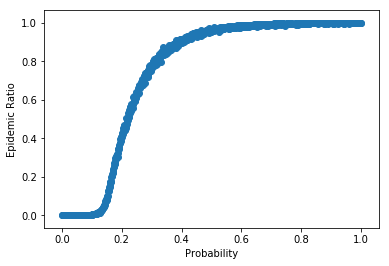

In [21]:
figure = plt.figure()
plt.scatter(probability, epidimic_size)
plt.xlabel('Probability')
plt.ylabel('Epidemic Ratio')

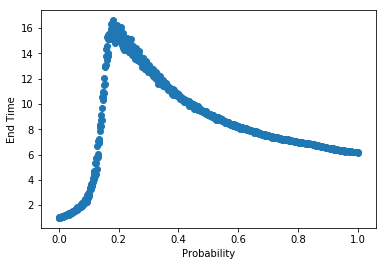

In [22]:
figure = plt.figure()
plt.scatter(probability, end_time)
plt.xlabel('Probability')
plt.ylabel('End Time')

In [78]:
def main_1c(prob_granularity, epsilon_granularity, iterations):
    n = 200
    c = 8
    l = 2 # This doesnt matter since e = 0
    epsilon_increment = float(2 * c) / float(epsilon_granularity)
    iter_data = [] #     iter_data = [probability, end_time, infected_ratio]
    
    # Iterage over 500 probabilities
    # For each of the probabilities, take the average of 100 trials
    print('[time, ratio, e, probability]')
    for i in range(prob_granularity+1):
        if np.mod(i, 10) == 0:
            print(i)
        # for every epsilon in [0, 2c]
        for j in range(epsilon_granularity+1):     
            probability_values = []
            for k in range(iterations):
                e = float(j) * epsilon_increment 
                G = create_planted_partition_graph(c,k,e,l)
                G = initialize_graph(G)
                unlucky_node = np.random.randint(n)
                G.node[unlucky_node]['infected'] = True
                previous_infected_count = -1
                current_infected_count = 1
                time = 0
        #         iter_data.append([(i/prob_granularity), time, 1/G.number_of_nodes(), G.copy()])
                while current_infected_count > previous_infected_count:
                    time += 1
 
                    previous_infected_count = current_infected_count
#                     print('i :' + str(i))
#                     print('prob_granularity: ' + str(prob_granularity))
                    probability = (float(i) / float(prob_granularity))
                    G, infections = infect(G, probability=probability)
        #             print("infections: " + str(infections))
                    if i == 0:
    #                     print("infections: " + str(infections))
                        assert len(infections) == 1
                    current_infected_count = len(infections)
                    if current_infected_count > G.number_of_nodes():
                        raise ValueError("The number of infected nodes exceeds the number of nodes")
                ratio = round((float(len(infections)) / float(G.number_of_nodes())), 4)
#                 print([time, ratio, round(e, 4), probability])
                probability_values.append([time, ratio, e, probability])
    #         print("Probability: " + str(probability))
    #         print("iteration values list")
    #         print(probability_values)
        
            avg_time = [_i[0] for _i in probability_values]
            avg_ratio = [_i[1] for _i in probability_values]

            avg_time = round(np.mean(avg_time), 4)
            avg_ratio = round(np.mean(avg_ratio), 4)
            iter_data.append([probability, e, avg_time, avg_ratio])
#         print progress every 100 iterations
    return iter_data

In [79]:
prob_1c_vals = main_1c(prob_granularity=5, epsilon_granularity=5, iterations=5)

[time, ratio, e, probability]
0
[1, 0.005, 0.0, 0.0]
[1, 0.005, 0.0, 0.0]
[1, 0.005, 0.0, 0.0]
[1, 0.005, 0.0, 0.0]
[1, 0.005, 0.0, 0.0]
[1, 0.005, 3.2, 0.0]
[1, 0.005, 3.2, 0.0]
[1, 0.005, 3.2, 0.0]
[1, 0.005, 3.2, 0.0]
[1, 0.005, 3.2, 0.0]
[1, 0.005, 6.4, 0.0]
[1, 0.005, 6.4, 0.0]
[1, 0.005, 6.4, 0.0]
[1, 0.005, 6.4, 0.0]
[1, 0.005, 6.4, 0.0]
[1, 0.005, 9.6, 0.0]
[1, 0.005, 9.6, 0.0]
[1, 0.005, 9.6, 0.0]
[1, 0.005, 9.6, 0.0]
[1, 0.005, 9.6, 0.0]
[1, 0.005, 12.8, 0.0]
[1, 0.005, 12.8, 0.0]
[1, 0.005, 12.8, 0.0]
[1, 0.005, 12.8, 0.0]
[1, 0.005, 12.8, 0.0]
[1, 0.005, 16.0, 0.0]
[1, 0.005, 16.0, 0.0]
[1, 0.005, 16.0, 0.0]
[1, 0.005, 16.0, 0.0]
[1, 0.005, 16.0, 0.0]
[2, 0.01, 0.0, 0.2]
[3, 0.015, 0.0, 0.2]
[2, 0.01, 0.0, 0.2]
[5, 0.055, 0.0, 0.2]
[15, 0.715, 0.0, 0.2]
[1, 0.005, 3.2, 0.2]
[16, 0.715, 3.2, 0.2]
[20, 0.745, 3.2, 0.2]
[11, 0.655, 3.2, 0.2]
[15, 0.755, 3.2, 0.2]
[2, 0.01, 6.4, 0.2]
[12, 0.82, 6.4, 0.2]
[13, 0.825, 6.4, 0.2]
[11, 0.845, 6.4, 0.2]
[11, 0.875, 6.4, 0.2]
[12, 0.8

In [60]:
prob_1c_vals

[[0.0, 0.0, 2.0, 0.005],
 [0.0, 3.2, 2.0, 0.005],
 [0.0, 6.4, 2.0, 0.005],
 [0.0, 9.600000000000001, 2.0, 0.005],
 [0.0, 12.8, 2.0, 0.005],
 [0.2, 0.0, 10.6, 0.384],
 [0.2, 3.2, 15.6, 0.608],
 [0.2, 6.4, 10.6, 0.695],
 [0.2, 9.600000000000001, 11.2, 0.895],
 [0.2, 12.8, 10.0, 0.94],
 [0.4, 0.0, 6.8, 0.573],
 [0.4, 3.2, 8.2, 0.969],
 [0.4, 6.4, 7.8, 0.988],
 [0.4, 9.600000000000001, 7.4, 0.997],
 [0.4, 12.8, 7.4, 0.995],
 [0.6, 0.0, 8.0, 0.991],
 [0.6, 3.2, 7.2, 0.999],
 [0.6, 6.4, 6.4, 1.0],
 [0.6, 9.600000000000001, 6.2, 0.999],
 [0.6, 12.8, 6.0, 1.0],
 [0.8, 0.0, 6.6, 1.0],
 [0.8, 3.2, 6.2, 1.0],
 [0.8, 6.4, 6.0, 1.0],
 [0.8, 9.600000000000001, 5.8, 1.0],
 [0.8, 12.8, 5.4, 1.0]]

##  Problem 2

In [17]:
def create_lattice_network(width, height):
    ctr = 0
    node_mat = []
    for i in range(width):
        row = []
        for j in range(height):
            row.append(ctr)
            ctr += 1
        node_mat.append(row)
    print(node_mat)
    G = nx.Graph()
    G.add_nodes_from(range(int(ctr)))

    for i in range(width):
        for j in range(height):
            # if i is greater than the minimum
            if i > 1:
                G.add_edge(node_mat[i][j], node_mat[i-1][j])
            if i < width - 2:
                G.add_edge(node_mat[i][j], node_mat[i+1][j])
            if j > 1:
                G.add_edge(node_mat[i][j], node_mat[i][j-1])
            if j < height - 2:
                G.add_edge(node_mat[i][j], node_mat[i][j+1])
#     nx.draw(G)
    return G

In [18]:
F = create_lattice_network(5, 5)

[[0, 1, 2, 3, 4], [5, 6, 7, 8, 9], [10, 11, 12, 13, 14], [15, 16, 17, 18, 19], [20, 21, 22, 23, 24]]


In [23]:
lattice_edges = F.edges()

In [24]:
nx.draw(F)

In [22]:
F.nodes()

NodeView((0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24))

In [43]:
def main2(iterations):
    n = 100
    c = 8
    e = 0
    l = 2 # This doesnt matter since e = 0
    iter_data = [] #     iter_data = [probability, end_time, infected_ratio]
    t = 0
    G = create_planted_partition_graph(c,n,e,l)
    G = initialize_graph(G)
    unlucky_node = np.random.randint(50)
    G.node[unlucky_node]['infected'] = True
    previous_infected_count = -1
    current_infected_count = 1
    time = 0
    iter_data.append([.3, time, 1/G.number_of_nodes(), G.copy()])
    while current_infected_count > previous_infected_count:
        previous_infected_count = current_infected_count
        G, infections = infect(G, probability=.3, unlucky_node=unlucky_node)
        current_infected_count = len(infections)
        if current_infected_count > G.number_of_nodes():
            raise ValueError("The number of infected nodes exceeds the number of nodes")
        time += 1
#             print("Probability: " + str(i/iterations))
#             print("End Time: " + str(time))
#             print("Infected Ratio: " + str((len(infections) / G.number_of_nodes())))
        iter_data.append([.3, time, (len(infections) / G.number_of_nodes()), G.copy()])
    return iter_data

[time, ratio, episilon, probability]

In [2]:
import pickle
results_1c = pickle.load(open('multithreaded_problem_1/1c_data.pkl', 'rb'))

In [3]:
# [time, ratio, epsilon, probability]
results_1c

[(1.0, 0.0050000000000000001, 0.0, 0.0),
 (1.0, 0.0050000000000000001, 0.16, 0.0),
 (1.0, 0.0050000000000000001, 0.32, 0.0),
 (1.0, 0.0050000000000000001, 0.48, 0.0),
 (1.0, 0.0050000000000000001, 0.64, 0.0),
 (1.0, 0.0050000000000000001, 0.8, 0.0),
 (1.0, 0.0050000000000000001, 0.96, 0.0),
 (1.0, 0.0050000000000000001, 1.12, 0.0),
 (1.0, 0.0050000000000000001, 1.28, 0.0),
 (1.0, 0.0050000000000000001, 1.44, 0.0),
 (1.0, 0.0050000000000000001, 1.6, 0.0),
 (1.0, 0.0050000000000000001, 1.76, 0.0),
 (1.0, 0.0050000000000000001, 1.92, 0.0),
 (1.0, 0.0050000000000000001, 2.08, 0.0),
 (1.0, 0.0050000000000000001, 2.24, 0.0),
 (1.0, 0.0050000000000000001, 2.4, 0.0),
 (1.0, 0.0050000000000000001, 2.56, 0.0),
 (1.0, 0.0050000000000000001, 2.72, 0.0),
 (1.0, 0.0050000000000000001, 2.88, 0.0),
 (1.0, 0.0050000000000000001, 3.04, 0.0),
 (1.0, 0.0050000000000000001, 3.2, 0.0),
 (1.0, 0.0050000000000000001, 3.36, 0.0),
 (1.0, 0.0050000000000000001, 3.52, 0.0),
 (1.0, 0.0050000000000000001, 3.68, 0.0

In [7]:
len(results_1c)

101101

In [42]:
times = [_i[0] for _i in results_1c]
ratios = [_i[1] for _i in results_1c]
epsilons = [_i[2] for _i in results_1c]
probabilities = [_i[3] for _i in results_1c]

times_reduced = []
ratios_reduced = []
epsilons_reduced = []
probabilities_reduced = []
for i in range(len(probabilities)):
    if np.mod(i, 500) == 0:
        times_reduced.append(times[i])
        ratios_reduced.append(ratios[i])
        epsilons_reduced.append(epsilons[i])
        probabilities_reduced.append(probabilities[i])

In [17]:
len(times)

101101

In [18]:
len(times_reduced)

25276

In [3]:
G = nx.erdos_renyi_graph(25, p=.2)

In [34]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

In [43]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(probabilities_reduced, epsilons_reduced, times_reduced, cmap = cm.coolwarm)
ax.set_ylabel('Epsilon')
ax.set_xlabel('Probability')
ax.set_zlabel('Time')

In [44]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
m_probabilities, m_epsilons = np.meshgrid(probabilities_reduced, epsilons_reduced)
# ax.scatter(probabilities, epsilons, ratios)
surf = ax.plot_surface(m_probabilities, m_epsilons, ratios_reduced, cmap = cm.coolwarm)
ax.set_xlabel('Probability')
ax.set_ylabel('Epsilon')
ax.set_zlabel('Ratio')

In [36]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
m_probabilities, m_epsilons = np.meshgrid(probabilities_reduced, epsilons_reduced)
# ax.scatter(probabilities, epsilons, ratios)
surf = ax.plot_surface(m_probabilities, m_epsilons, times_reduced, cmap = cm.coolwarm)
ax.set_xlabel('Probability')
ax.set_ylabel('Epsilon')
ax.set_zlabel('Time')

In [ ]:
len(ratio)

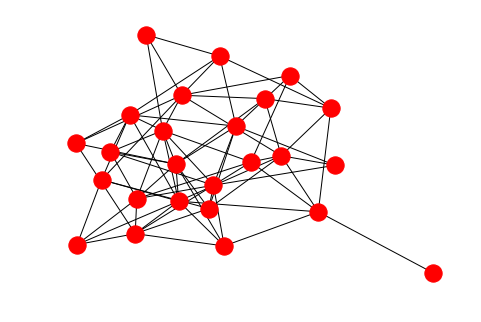

In [5]:
nx.draw(G)

In [28]:
for edge in lattice_edges: 
    G.add_edge(edge[0], edge[1])

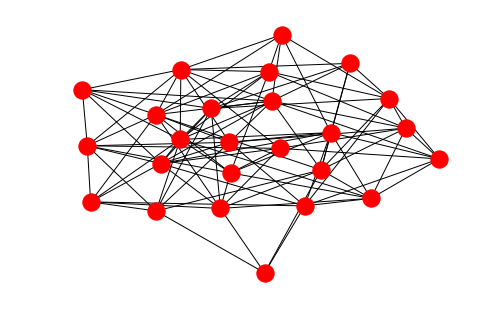

In [29]:
nx.draw(G)